In [1]:
import pandas as pd
import numpy as np
import datetime

In [3]:
import matplotlib.pyplot as plt
from collections import Counter 

# Jupyter Notebook에서 그래프를 출력할 때 사용 (기본적으로 Matplotlib는 별도의 창) 
%matplotlib inline

In [4]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [5]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [6]:
chipo.shape

(4622, 5)

### Create a histogram of the top 5 items bought.

- **groupby() 뒤에 value_counts()를 사용할 수 없다** → value_counts()가 시리즈에서만 작동하는 함수이기 때문
- groupby()를 하면 DataFrame 형태가 된다!!!

In [20]:
chipo.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [13]:
top = chipo.groupby('item_name')['quantity'].sum()
top.head()

item_name
6 Pack Soft Drink        55
Barbacoa Bowl            66
Barbacoa Burrito         91
Barbacoa Crispy Tacos    12
Barbacoa Salad Bowl      10
Name: quantity, dtype: int64

In [17]:
top_item = top.sort_values(ascending=False).head(5)
print(top_item)

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64


Text(0.5, 1.0, 'Most Top 5 Items')

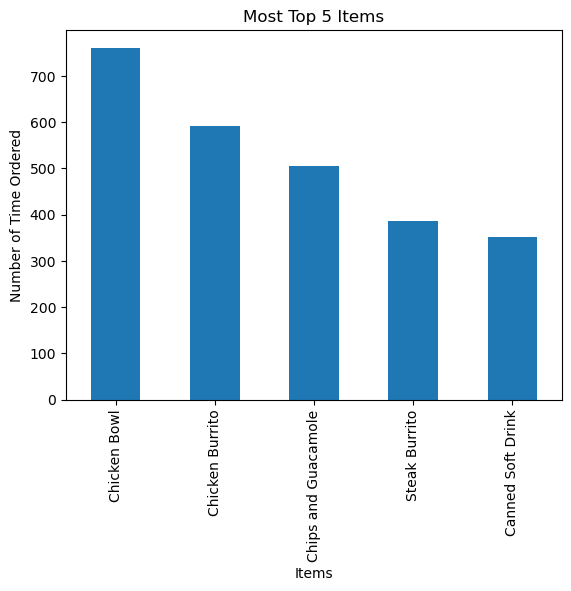

In [18]:
top_item.plot(kind='bar')

plt.xlabel('Items')
plt.ylabel('Number of Time Ordered')
plt.title('Most Top 5 Items')

In [19]:
five = chipo['item_name']

five_counts = Counter(five) 
print(five_counts)

Counter({'Chicken Bowl': 726, 'Chicken Burrito': 553, 'Chips and Guacamole': 479, 'Steak Burrito': 368, 'Canned Soft Drink': 301, 'Chips': 211, 'Steak Bowl': 211, 'Bottled Water': 162, 'Chicken Soft Tacos': 115, 'Chips and Fresh Tomato Salsa': 110, 'Chicken Salad Bowl': 110, 'Canned Soda': 104, 'Side of Chips': 101, 'Veggie Burrito': 95, 'Barbacoa Burrito': 91, 'Veggie Bowl': 85, 'Carnitas Bowl': 68, 'Barbacoa Bowl': 66, 'Carnitas Burrito': 59, 'Steak Soft Tacos': 55, '6 Pack Soft Drink': 54, 'Chips and Tomatillo Red Chili Salsa': 48, 'Chicken Crispy Tacos': 47, 'Chips and Tomatillo Green Chili Salsa': 43, 'Carnitas Soft Tacos': 40, 'Steak Crispy Tacos': 35, 'Chips and Tomatillo-Green Chili Salsa': 31, 'Steak Salad Bowl': 29, 'Nantucket Nectar': 27, 'Barbacoa Soft Tacos': 25, 'Chips and Roasted Chili Corn Salsa': 22, 'Izze': 20, 'Chips and Tomatillo-Red Chili Salsa': 20, 'Veggie Salad Bowl': 18, 'Chips and Roasted Chili-Corn Salsa': 18, 'Barbacoa Crispy Tacos': 11, 'Barbacoa Salad Bowl

- **Counter(): 아이템별 등장 횟수를 계산**
- **sort_values()를 사용해 아이템을 구매한 총량(quantity)을 기준으로 정렬 후, 상위 5개 출력**

In [24]:
df = pd.DataFrame.from_dict(five_counts, orient='index') # 딕셔너리의 키를 행(index) 이름으로 사용

df.head()

,0
Chips and Fresh Tomato Salsa,110
Izze,20
Nantucket Nectar,27
Chips and Tomatillo-Green Chili Salsa,31
Chicken Bowl,726


In [25]:
df.shape

(50, 1)

In [27]:
df = df[0].sort_values(ascending=True)[45:50]

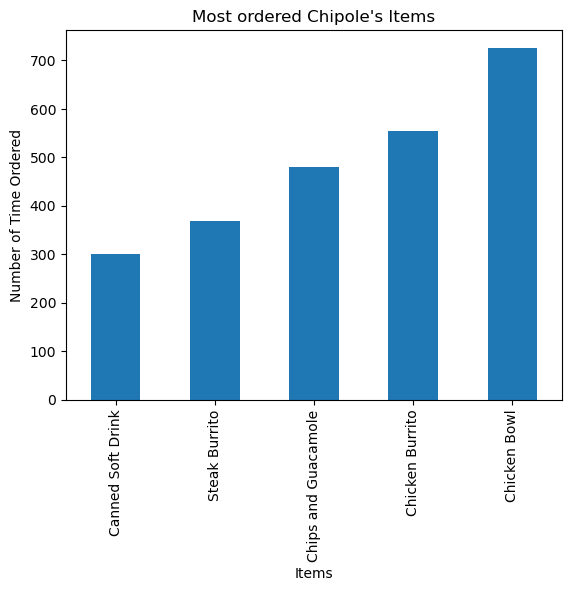

In [28]:
df.plot(kind='bar')

plt.xlabel('Items')
plt.ylabel('Number of Time Ordered')
plt.title('Most ordered Chipole\'s Items')

plt.show()

### Create a scatterplot with the number of items ordered per order price.

In [30]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [31]:
# item_price의 데이터 타입이 object → float으로 변경

chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)

In [33]:
chipo['item_price'].dtypes

dtype('float64')

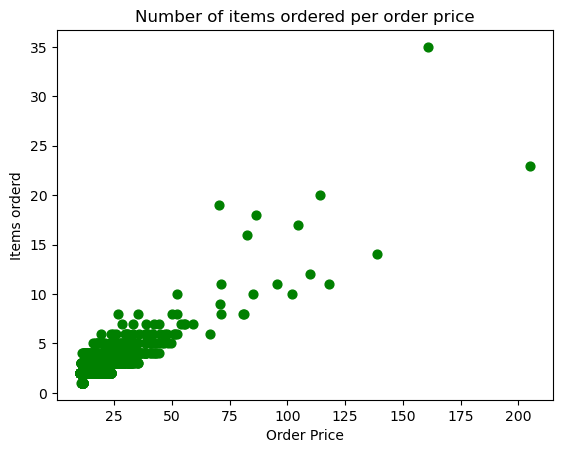

In [37]:
# 주문 가격당 주문한 품목 수 → 각 주문(order_id)을 기준으로 주문한 품목 수와 주문가격 합산 
orders = chipo.groupby(by='order_id').sum()

# s:점의 크기, c:점의 색상
plt.scatter(x=orders['item_price'], y=orders['quantity'], s=40, c='green') 

plt.xlabel('Order Price')
plt.ylabel('Items orderd')
plt.title('Number of items ordered per order price')

plt.show()

In [39]:
orders.head()

,quantity,item_name,choice_description,item_price
order_id,,,,
1,4,Chips and Fresh Tomato SalsaIzzeNantucket Nect...,[Clementine][Apple],11.56
2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
3,2,Chicken BowlSide of Chips,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",12.67
4,2,Steak BurritoSteak Soft Tacos,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",21.00
5,2,Steak BurritoChips and Guacamole,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",13.70


### Create a question and a graph to answer your own question.